만들어진 모델을 활용하여 이미지를 분류해봅시다

In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [19]:
# 모델 불러오기
data_dir = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset'
model = tf.keras.models.load_model(data_dir + 'mask.h5')

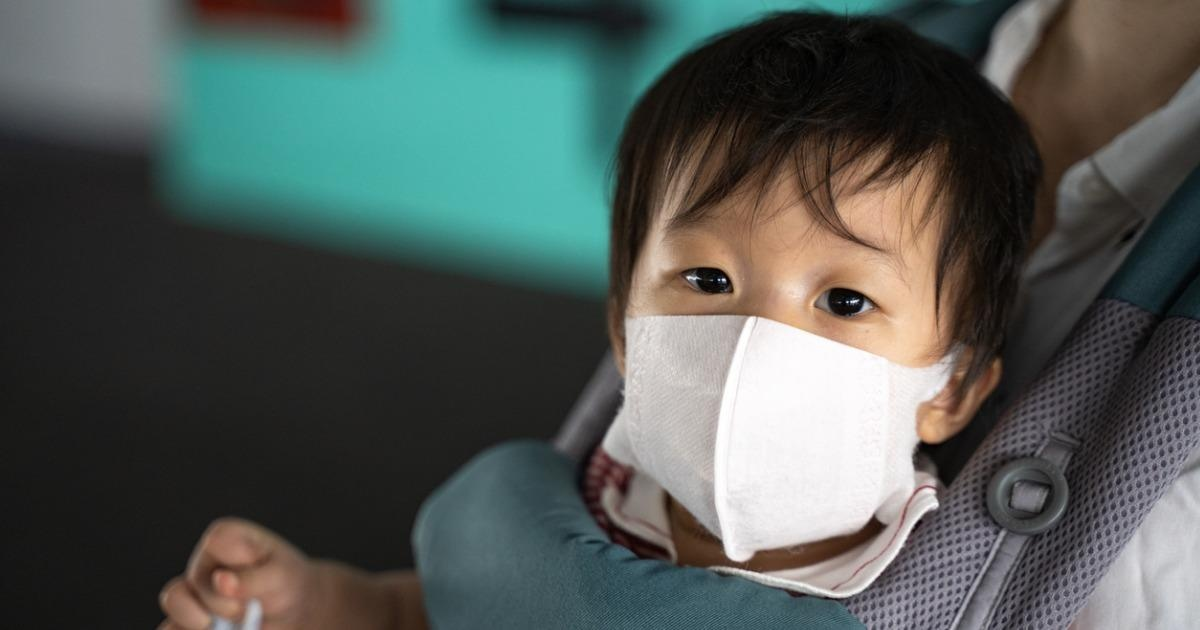

In [20]:
# 이미지를 불러오기

file = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset/Test/Mask/2085.jpg'

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(file)
cv2_imshow(img)

불러온 모델에 이미지를 바로 넣는 경우
데이터 형태가 맞지 않아 오류가 발생합니다

In [21]:
# 이미지 한장을 바로 넣으면 오류 발생!!!
# 모델의 입력과 맞지 않음

model.predict(img)

ValueError: ignored

In [22]:
# 이미지의 형태 확인
img.shape

(630, 1200, 3)


expected shape=(None, 150, 150, 3), found shape=(None, 1200, 3)

불러온 이미지는 차원수와 이미지 사이즈가 다름

이미지를 resize하고 차원수를 하나 늘려줘야 함

In [23]:
# 이미지 사이즈 맞추기
width = 150
height = 150

img = cv2.resize(img, dsize=(width, height))


In [24]:
img.shape

(150, 150, 3)

In [25]:
# 차원수 맞추기
import numpy as np
img = np.expand_dims(img, 0)

In [26]:
img.shape

(1, 150, 150, 3)

In [27]:
# 다시 predict 해보기
# 입력 사이즈가 맞지 않아서 다시 오류 발생

pred = model.predict(img)

In [28]:
pred

array([[0.93520445, 0.0647956 ]], dtype=float32)

In [34]:
res = np.argmax(pred) # 최대 확률 클래스 선정
res

0

In [32]:
# 라벨
# ['Mask', 'Non Mask']
class_label = ['Mask', 'Non Mask']

In [33]:
class_label[res]

'Mask'

깔끔하게 함수로 재정리

In [42]:
# 전처리 함수
# 파일 경로를 넣으면 이미지를 읽어서 모델에 넣을 수 있게 변환

def preprocessing(file, width = 150, height = 150):
  img = cv2.imread(file)
  img = cv2.resize(img, dsize=(width, height))
  cv2_imshow(img)
  imgs = np.expand_dims(img, 0)
  return imgs

In [43]:
def predict_mask(imgs, class_label):
  pred = model.predict(imgs)
  res = np.argmax(pred)
  return class_label[res] 

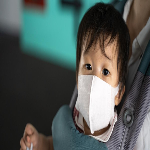

'Mask'

In [44]:
# 이미지 불러와서 테스트
file = '/content/drive/MyDrive/Tensorflow AI/New Masks Dataset/Test/Mask/2085.jpg'
predict_mask(preprocessing(file), ['Mask', 'No Mask'])